# Proyecto #1

## 1. Paquete

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [101]:
filepath = 'A:\Documents\GitHub\proyecto1\proyecto_training_data.npy'
df = np.load(filepath)

In [102]:
datos = pd.DataFrame(df)

## 2. Separar el df

In [114]:
datos.columns = ['SalePrice', 'OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']

## 3. Análisis exploratorio

In [115]:
for i in datos.columns:
    print(i)
    print(datos[i].describe())
    print(f'Peak to peak', np.ptp(datos[i]))
    
    

SalePrice
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Peak to peak 720100.0
OverallQual
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64
Peak to peak 9.0
1stFlrSF
count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64
Peak to peak 4358.0
TotRmsAbvGrd
count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64
Peak to peak 12.0
YearBuilt
count    1460.000000
mean     1971.267808
std    

## 4. Histogramas

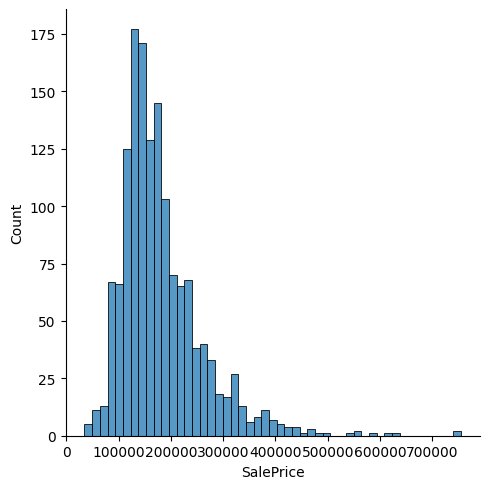

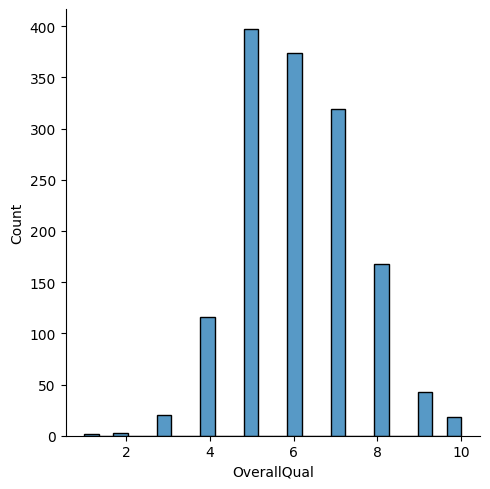

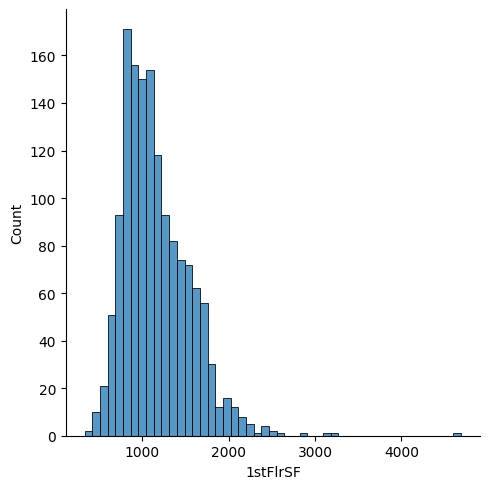

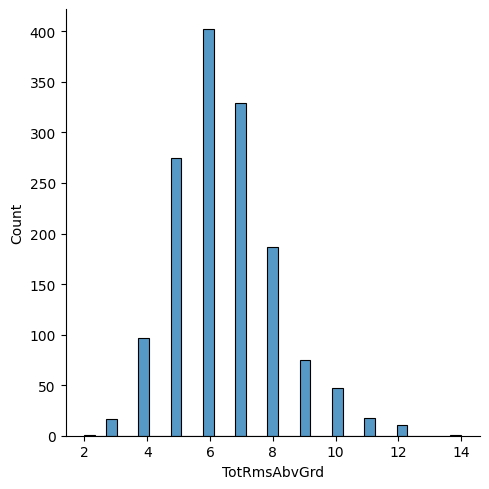

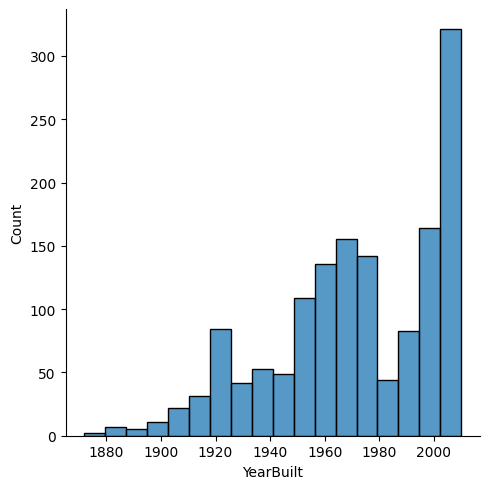

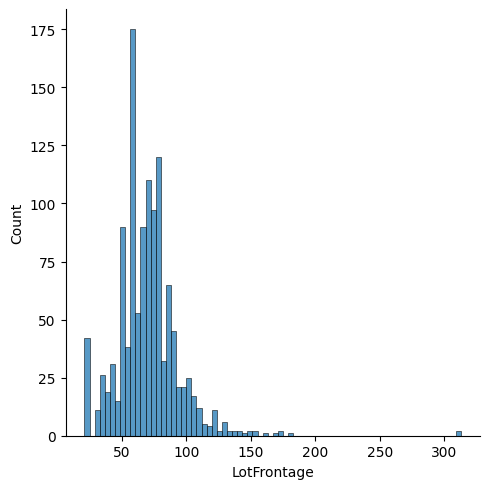

In [116]:
for i in datos.columns:
    sns.displot(datos[i])
    

## 5. Correlación

In [117]:
datos.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [118]:
correlations = datos.corrwith(datos['SalePrice'])

In [119]:
correlations

SalePrice       1.000000
OverallQual     0.790982
1stFlrSF        0.605852
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
LotFrontage     0.351799
dtype: float64

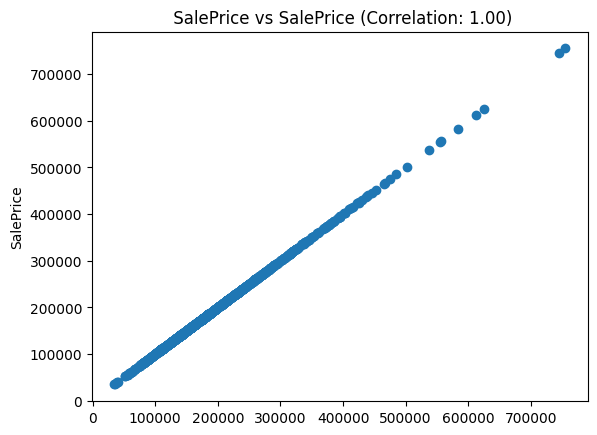

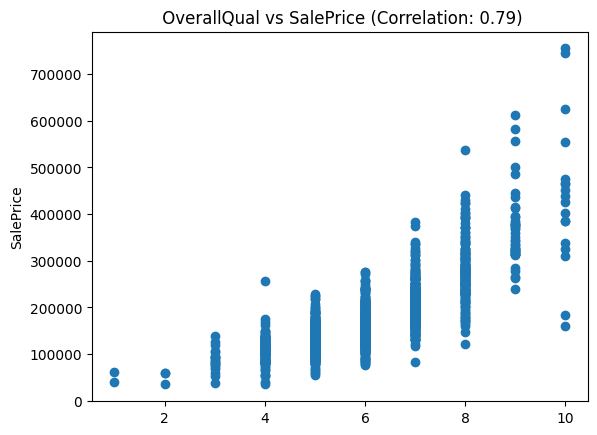

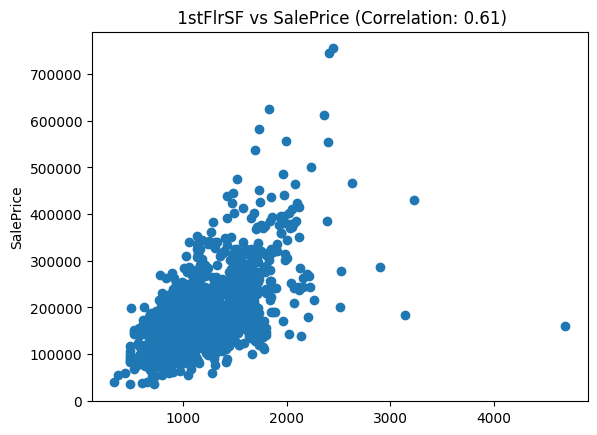

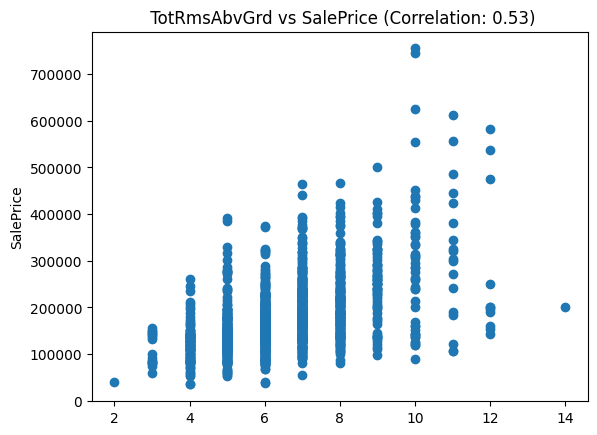

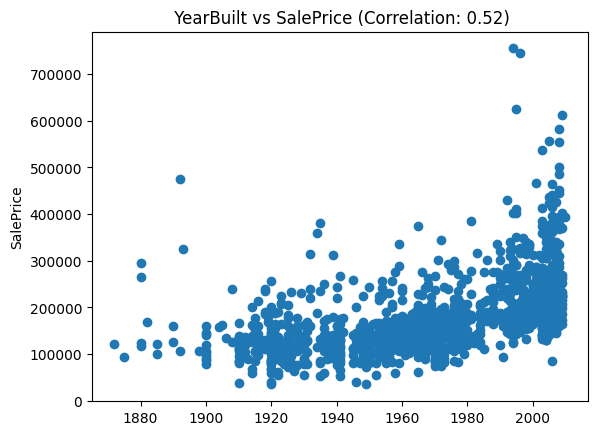

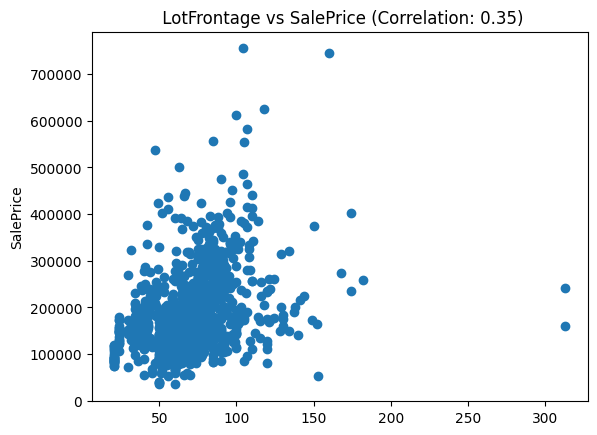

In [121]:
for i in datos.columns:
    plt.scatter(datos[i], datos['SalePrice'])
    plt.title(f' {i} vs SalePrice (Correlation: {correlations[i]:.2f})')
    plt.ylabel('SalePrice')
    plt.show()

In [110]:
print(f'Se decide elegir las variables Over all Quality y First Floor square feet')

Se decide elegir las variables X1 y X4


## 6. Función para entrar un modelo de regresión lineal.

In [242]:
x1_train, x1_test, y_train, y_test = train_test_split(datos['OverallQual'], datos['SalePrice'], test_size=0.2, random_state=42)
x2_train, x2_test, y_train, y_test = train_test_split(datos['1stFlrSF'], datos['SalePrice'], test_size=0.2, random_state=42)


#se cambia el nombre de las variables por practicidad

In [214]:
def train_linear_regression(x, y, epochs, imprimir_cada, alpha):
    
    beta0 = 0
    beta1 = 0
    
   
    m = len(x)
    
    
    for epoch in range(epochs):
        
        y_pred = beta0 + beta1 * x
        
        
        error = np.mean((y_pred - y) ** 2)
        
        
        beta0 -= alpha * (1/m) * np.sum(y_pred - y)
        beta1 -= alpha * (1/m) * np.sum((y_pred - y) * x)
        
        
        if epoch % imprimir_cada == 0:
            print(f"Iteración {epoch}: Error = {error}")
    
    
    return beta0, beta1


Iteración 0: Error = 38885583525.70976
Iteración 100: Error = 2638774350.997268
Iteración 200: Error = 2578654620.0418663
Iteración 300: Error = 2528718377.123608
Iteración 400: Error = 2487240673.927612
Iteración 500: Error = 2452788745.5910864
Iteración 600: Error = 2424172518.6872873
Iteración 700: Error = 2400403502.50303
Iteración 800: Error = 2380660643.5906105
Iteración 900: Error = 2364261964.1074505
Parámetros entrenados:
beta0: -52735.14399945707
beta1: 38538.397818258


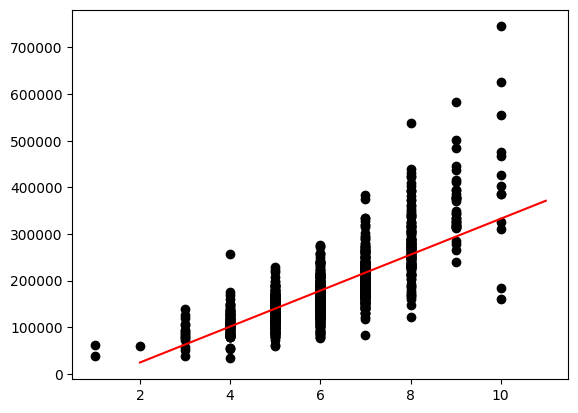

In [243]:
beta0a, beta1a = train_linear_regression(x1_train, y_train, epochs=1000, imprimir_cada=100, alpha=0.02)
print("Parámetros entrenados:")
print("beta0:", beta0a)
print("beta1:", beta1a)

plt.scatter(x1_train, y_train, color = 'black')
plt.plot(list(range(2,12)), [beta1a * x1 + beta0a for x1 in range(2,12)], color = 'red')
plt.show()

Iteración 0: Error = 38885583525.70976
Parámetros entrenados:
beta0: -1.4595420705662892e+223
beta1: -1.893184285860397e+226


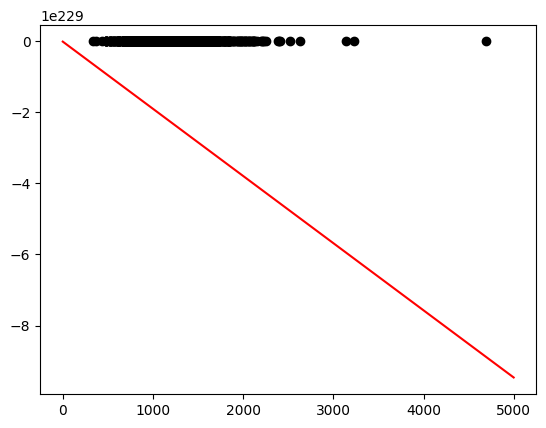

In [257]:
beta0b, beta1b = train_linear_regression(x2_train, y_train, epochs=50, imprimir_cada=100, alpha=0.02)
print("Parámetros entrenados:")
print("beta0:", beta0b)
print("beta1:", beta1b)

plt.scatter(x2_train, y_train, color = 'black')
plt.plot(list(range(2,5000)), [beta1b * x1 + beta0b for x1 in range(2,5000)], color = 'red')
plt.show()

## 7. Entrenar el modelo

In [259]:
# Vector de datos x
x1_train_array = np.array(x1_train)
y_train_array = np.array(y_train)

In [260]:
epochs_pred = 100
alpha = 0.01

In [280]:
def regresion_lineal(x,y,alpha,epochs):

    matriz_x_ones = np.column_stack((x, np.ones_like(x)))

    beta_matrix = np.array([[beta0a], [beta1a]])

    error_list = []
    models = {}

    for i in range(epochs):

        y_trial = np.dot(matriz_x_ones, beta_matrix)

        error = np.mean((y_trial - y) ** 2)/2
        error_list.append(error)

        grad_beta1 = np.mean((y_trial - y) * x)
        grad_beta0 = np.mean(y_trial - y)

        updated_beta1 = beta_matrix[0] - alpha*grad_beta1
        updated_beta0 = beta_matrix[1] - alpha*grad_beta0

        beta_matrix[0] = updated_beta1
        beta_matrix[1] = updated_beta0

        models[i] = beta_matrix.copy()

    return models, error_list

In [281]:
def plot_learning_curve(errors):
    plt.plot(range(len(errors)), errors)
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.title('Learning Curve')
    plt.show()

In [282]:
def visualize_model_evolution(models, n):
 
    num_iterations = len(models)
    selected_iterations = range(0, num_iterations, n)

    for iteracion in selected_iterations:
        beta0, beta1 = models[iteracion]
        y_toplot = beta0 + beta1 * x1_train_array
        
        plt.plot(x1_train_array,y_toplot , label=f"iteracion {iteracion}")

    plt.scatter(x1_train_array, y_train_array, color='red', label='Data')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Evolucion del modelo')
    plt.legend()
    plt.show()

In [283]:
models, errors_list = regresion_lineal(x1_train_array, y_train_array, alpha, epochs_pred)

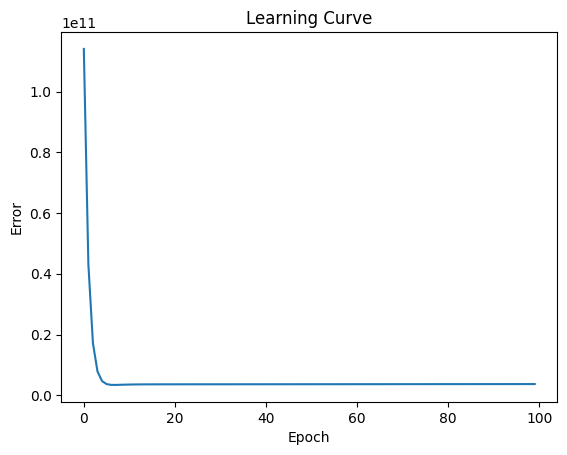

3401138024.426309


In [284]:
plot_learning_curve(errors_list)
min_error = min(errors_list)
print(min_error)

In [285]:
position = errors_list.index(min_error)

In [286]:
position

7

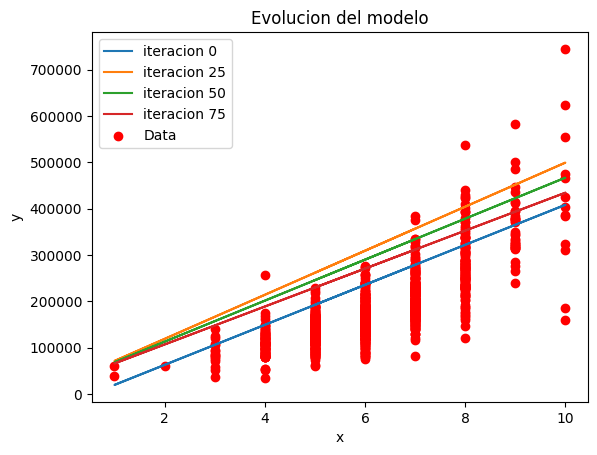

In [287]:
visualize_model_evolution(models, n=25)

## Sklearn

In [288]:
from sklearn.linear_model import LinearRegression

In [289]:
modelSKL = LinearRegression()

In [290]:
y_test_array = np.array(y_test)
x1_test_array = np.array(x1_test)
x4_test_array = np.array(x2_test)

In [291]:
x_train = x1_train_array.reshape(-1, 1)
y_train = y_train_array.reshape(-1, 1)
x_test = x1_test_array.reshape(-1, 1)
y_test = y_test_array.reshape(-1, 1)

In [292]:
 # Modelo skit
modelSKL.fit(x_train, y_train)

LinearRegression()

In [293]:
def promediar_predicciones( modelo_m, modelo_sklearn, x,position):
 

  betat1, betat0 = modelo_m[position][0][0], modelo_m[position][1][0]

  ypreds = [i * betat1 + betat0 for i in x]

  prediccion_manual = np.array(ypreds)

  prediccion_sklearn = modelo_sklearn.predict(x)

  prediccion_promedio = (prediccion_manual + prediccion_sklearn) / 2

  return prediccion_manual, prediccion_sklearn, prediccion_promedio
  


In [294]:
prediccion_manual,prediccion_sklearn,prediccion_promedio = promediar_predicciones(models, modelSKL, x_test,position)

In [295]:
len(y_test)

292

In [296]:
print(len(y_test))
print(prediccion_manual.shape)
print(prediccion_sklearn.shape)
print(prediccion_promedio.shape)


292
(292, 1)
(292, 1)
(292, 1)


In [297]:
from sklearn.metrics import mean_squared_error

errors = []

error_manual = mean_squared_error(y_test, prediccion_manual)
error_sk = mean_squared_error(y_test, prediccion_sklearn)
error_prom = mean_squared_error(y_test, prediccion_promedio)

In [298]:
error_list = [error_manual,error_sk,error_prom]

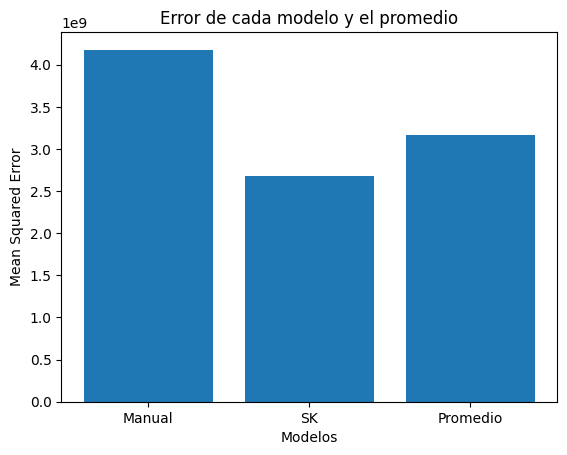

In [299]:
x_labels = ['Manual', 'SK', 'Promedio']  # Replace with appropriate labels
plt.bar(x_labels, error_list)
plt.xlabel('Modelos')
plt.ylabel('Mean Squared Error')
plt.title('Error de cada modelo y el promedio')
plt.show()

# El modelo mejor ajustadoes el de SK